In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('Cleaned.csv')

In [4]:
work_data = pd.DataFrame()
work_data["tweet"] = df.Tweets
work_data["gender"] = df.Gender

In [5]:
work_data.head()   

,tweet,gender
0,robbie responds critic win eddie edward worldt...,male
1,felt like friend living story retired ian,male
2,absolutely adore louis start song hit hard fee...,male
3,hi looking url use typically see advanced user,male
4,watching neighbour sky catching neighbs xxx xxx,female


In [6]:
get_female = work_data["gender"] == "female"
get_male = work_data["gender"] == "male"
get_brand = work_data["gender"] == "brand"

In [7]:
female_rows = work_data[get_female]
male_rows = work_data[get_male]
brand_rows = work_data[get_brand]

In [8]:
print("total female tweets: ",female_rows.tweet.count())
print("total male tweets:   ",male_rows.tweet.count())
print("total brand tweets:  ",brand_rows.tweet.count())   

total female tweets:  6453
total male tweets:    5882
total brand tweets:   5663


In [9]:
female_rows.gender = 0     # female
male_rows.gender = 1       # male
brand_rows.gender = 2      # brand

/home/arpit/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
frames = [female_rows, male_rows, brand_rows]
data = pd.concat(frames,ignore_index=True)


In [11]:
data.tail()

,tweet,gender
18004,white house ready tech step government via,2
18005,view community halloween spooktacular photo album,2
18006,jon stewart animal sanctuary educational cente...,2
18007,stan lisa coffee cup ufo,2
18008,best bloody mary brunch nycwff,2


In [12]:
data.dropna(inplace=True)
data.isnull().sum()

tweet     0
gender    0
dtype: int64

In [13]:
import re
import nltk as nlp

In [14]:
from nltk.corpus import stopwords
lemma = nlp.WordNetLemmatizer() 

In [15]:
All_tweets = data['tweet']
#All_descriptions = data['Description']
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
lematized_tweets = WordNetLemmatizer()
import nltk

In [16]:
description_list = []
for description in data.tweet:
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower()
    description = nltk.word_tokenize(description)
    #description = [ word for word in description if not word in set(stopwords.words("english"))]
    lemma = nlp.WordNetLemmatizer()
    description = [lemma.lemmatize(word) for word in description]
    description = " ".join(description)
    description_list.append(description)

In [17]:
print("Original version: ", data.tweet.iloc[2174])
print("New version:      ", description_list[2174])    # no

Original version:  think clip end hometown ª
New version:       think clip end hometown


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

max_features = 600

count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")

sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()
words = count_vectorizer.get_feature_names()


In [19]:
print("Most used 600 words on all tweets (alphabetically first 100) :", words[:100])

Most used 600 words on all tweets (alphabetically first 100) : ['able', 'account', 'act', 'actually', 'add', 'age', 'ago', 'agree', 'air', 'album', 'amas', 'amazing', 'america', 'american', 'amp', 'answer', 'app', 'apple', 'apply', 'art', 'article', 'artist', 'artistoftheyear', 'ask', 'asked', 'available', 'average', 'award', 'away', 'awesome', 'babe', 'baby', 'bacon', 'bad', 'ball', 'bc', 'beat', 'beautiful', 'beauty', 'bed', 'believe', 'best', 'better', 'big', 'biggest', 'biology', 'birthday', 'bit', 'bitch', 'black', 'blog', 'blood', 'blue', 'body', 'bond', 'book', 'bought', 'boy', 'break', 'bring', 'brother', 'budget', 'build', 'building', 'bus', 'business', 'buy', 'called', 'came', 'cancer', 'car', 'card', 'care', 'cat', 'catch', 'cause', 'chance', 'change', 'channel', 'character', 'chat', 'check', 'checked', 'child', 'chill', 'christmas', 'church', 'city', 'class', 'click', 'close', 'club', 'coffee', 'cold', 'college', 'come', 'coming', 'comment', 'company', 'cool']


In [20]:
y = data.gender.values
x = sparce_matrix

In [21]:
from sklearn.model_selection import train_test_split 

train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2)

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)

rfc.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
rfc.score(test_x,test_y)

0.4666666666666667

In [24]:
y_head_ml = rfc.predict(test_x)

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y,y_head_ml)

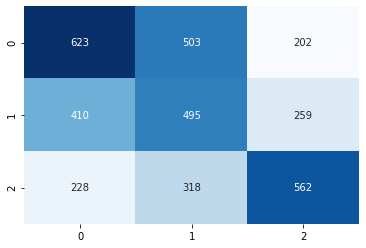

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm,cbar=False,annot=True,cmap="Blues",fmt="d")
plt.show()

svm


In [27]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_x, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
y_pred = svclassifier.predict(test_x)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_y,y_pred))
print(classification_report(test_y,y_pred))

[[848 331 149]
 [596 407 161]
 [384 234 490]]
              precision    recall  f1-score   support

           0       0.46      0.64      0.54      1328
           1       0.42      0.35      0.38      1164
           2       0.61      0.44      0.51      1108

    accuracy                           0.48      3600
   macro avg       0.50      0.48      0.48      3600
weighted avg       0.50      0.48      0.48      3600



Conclusion 
Brand is easy to seperate but genders are relatively more complex

In [30]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression


In [31]:
logreg=LogisticRegression()


In [32]:
logreg.fit(train_x,train_y)


/home/arpit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
logreg.score(test_x,test_y)

0.4888888888888889